In [1]:
import numpy as np
import matplotlib.pyplot as plt
from iminuit import Minuit

In [2]:
#loading in data files as numpy arrays 

exp_data = np.loadtxt('datafile-exp.txt',unpack=True,dtype=float)
res_data = np.loadtxt('datafile-expresonance.txt',unpack=True,dtype=float)

In [3]:
def maximum_likelihood_m(tau):
    """This is the maximum likelihood function for the exp distribution"""
    norm = 1/(tau*(np.exp(-0/tau)-np.exp(-10/tau))) # normalisation function
    pdf = np.exp(-exp_data/tau) # exponential pdf
    
    combined = norm*pdf # combining them
    
    return -np.sum(np.log(combined))

def log_likelihood_gauss(f,mean,tau):
    """This is the maximum likelihood function for the exp distribution with the Gaussian distribution"""
    sigma = 0.2 #pre-defined width
    exponential = np.exp(-res_data/tau) # exponential distribution
    exponential_norm = 1/(tau*(np.exp(-0/tau)-np.exp(-10/tau))) # exponential normalisation
    gauss = np.exp(-np.square(res_data-mean)/(2*np.square(sigma))) #normal distribution
    gauss_norm = 1/(np.sqrt(2*np.pi)*sigma) #gaussian normalisation
    total = (f*exponential*exponential_norm)+((1-f)*gauss*gauss_norm) # Combining them relative to fraction
    total[total < 1e-4] = 1e-4 # Clip values too small for the logarithm
    
    return -np.sum(np.log(total))

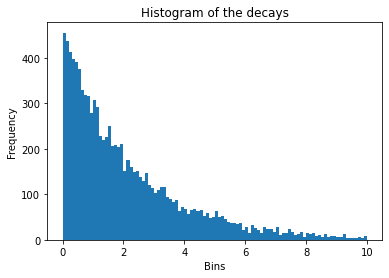

In [4]:
#Plotting the exponential data
plt.hist(exp_data,bins=100)
plt.title('Histogram of the decays')
plt.xlabel("Bins")
plt.ylabel('Frequency')
plt.show()

#This shows a nice exponential curve

In [11]:
#Solving with minuit

maximum_likelihood_m.errordef = Minuit.LIKELIHOOD # Tells Minuit to use log-likelihood for the error matrix (0.5)

m = Minuit(maximum_likelihood_m, tau = 1.) # Creates the object to minimise with tau guess = 1
m.migrad() # Runs the minimiser
print("Value for the lifetime as calculated by Minuit is:")
print("")
print("tau = "+str(np.asarray(m.values)[0])+" +/- "+str(np.asarray(m.errors)[0]))

Value for the lifetime as calculated by Minuit is:

tau = 2.2043090486593755 +/- 0.025042335474533856


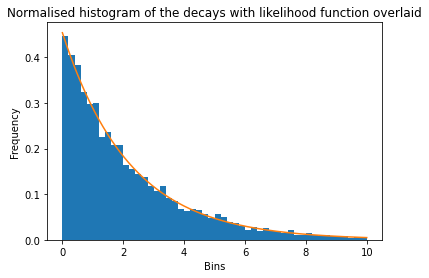

In [6]:
values = np.linspace(0,10,1000)
norm = 1/((np.asarray(m.values)[0])*(np.exp(-0/np.asarray(m.values)[0]))-np.exp(-10/np.asarray(m.values)[0]))
plt.hist(exp_data,bins=50,density=True) #Histogram is normalised
plt.plot(values,(1/np.asarray(m.values)[0])*np.exp(-values/np.asarray(m.values))) #plot exponential over the histogram
plt.title('Normalised histogram of the decays with likelihood function overlaid')
plt.xlabel("Bins")
plt.ylabel('Frequency')
plt.show()

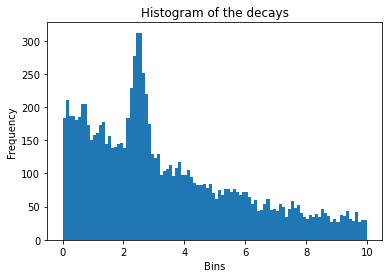

In [7]:
#Task 2
plt.hist(res_data,bins=100)
plt.title('Histogram of the decays')
plt.xlabel("Bins")
plt.ylabel('Frequency')
plt.show()

In [12]:
#Using minuit to optimize values

log_likelihood_gauss.errordef = Minuit.LIKELIHOOD # Tells Minuit to use log-likelihood for the error matrix (0.5)


m2 = Minuit(log_likelihood_gauss, f = 0.5, mean=2., tau=1.) # Uses log-likelihood function with the stated guesses
m2.migrad() # runs the minimisation

print("Best fit values calculated by minuit are:")
print("")
print("fraction = "+str(np.asarray(m2.values)[0])+" +/- "+str(np.asarray(m2.errors)[0]))
print("")
print("mean = "+str(np.asarray(m2.values)[1])+" +/- "+str(np.asarray(m2.errors)[1]))
print("")
print("tau = "+str(np.asarray(m2.values)[2])+" +/- "+str(np.asarray(m2.errors)[2]))

Best fit values calculated by minuit are:

fraction = 0.9028877924315303 +/- 0.004506057253323933

mean = 2.499873193931345 +/- 0.011787705782943182

tau = 5.043386551196604 +/- 0.10269461684065913


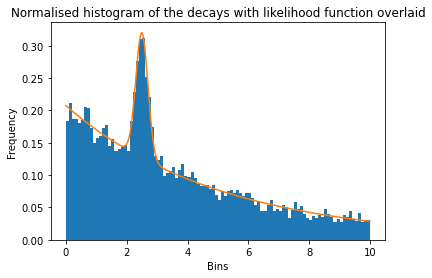

In [9]:
def function(f,mean,tau):
    """This function defines the combined normal and exponential distribution"""
    sigma = 0.2
    exponential = np.exp(-values/tau)
    exponential_norm = 1/(tau*(np.exp(-0/tau)-np.exp(-10/tau)))
    gauss = np.exp(-np.square(values-mean)/(2*np.square(sigma)))
    gauss_norm = 1/(np.sqrt(2*np.pi)*sigma)
    total = (f*exponential*exponential_norm)+((1-f)*gauss*gauss_norm)
    
    return total


plt.hist(res_data,bins=100,density=True)
plt.plot(values,function(np.asarray(m2.values)[0],np.asarray(m2.values)[1],np.asarray(m2.values)[2]))
plt.title('Normalised histogram of the decays with likelihood function overlaid')
plt.xlabel("Bins")
plt.ylabel('Frequency')
plt.show()